In [1]:
import pandas as pd
import numpy as np
import scipy
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
from scipy import stats
import math
import scipy.stats as scst
import matplotlib
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import pylab


# Q1

In [2]:
########  Q1
data = pd.read_csv (r"C:\Data\flextime.txt", sep = " ")
#print(data)
diff = data.after - data.before
print(diff)
n  = len(diff)

0    14
1    17
2    -2
3    15
4     7
5     6
6    -4
7     9
8     5
9     3
dtype: int64


In [3]:
### A non-parametric test for this case 
#(though we can use t-test, since the qq plot of diff and normality test shows that diff~normal.)
t2, p2  = scipy.stats.wilcoxon(x = diff, y=None, zero_method='wilcox', correction=False, alternative='two-sided')
print('Test statistic is: ', t2) 
print( 'p-value is: ',p2)

# exact test with correction=False
# In Python, by default, the test statistic is min (V+, V-). In R, the test statistics is V+
# p-value from Python might slightly different from R

Test statistic is:  4.0
p-value is:  0.016604878103722735


# Q2

In [4]:
########  Q2
data = pd.read_csv (r"C:\Data\gasoline.csv", sep = ",")
print(data)

        y     x1   x2     x3    x4    x5  x6  x7     x8    x9   x10  x11
0   18.90  350.0  165  260.0  8.00  2.56   4   3  200.3  69.9  3910    1
1   17.00  350.0  170  275.0  8.50  2.56   4   3  199.6  72.9  3860    1
2   20.00  250.0  105  185.0  8.25  2.73   1   3  196.7  72.2  3510    1
3   18.25  351.0  143  255.0  8.00  3.00   2   3  199.9  74.0  3890    1
4   20.07  225.0   95  170.0  8.40  2.76   1   3  194.1  71.8  3365    0
5   11.20  440.0  215  330.0  8.20  2.88   4   3  184.5  69.0  4215    1
6   22.12  231.0  110  175.0  8.00  2.56   2   3  179.3  65.4  3020    1
7   21.47  262.0  110  200.0  8.50  2.56   2   3  179.3  65.4  3180    1
8   34.70   89.7   70   81.0  8.20  3.90   2   4  155.7  64.0  1905    0
9   30.40   96.9   75   83.0  9.00  4.30   2   5  165.2  65.0  2320    0
10  16.50  350.0  155  250.0  8.50  3.08   4   3  195.4  74.4  3885    1
11  36.50   85.3   80   83.0  8.50  3.89   2   4  160.6  62.2  2009    0
12  21.50  171.0  109  146.0  8.20  3.22   2   4  1

In [5]:
auto = data.y[data.x11 == 1 ]

manual = data.y[data.x11 == 0 ]

In [6]:
######### Normality test:

print(scst.shapiro(auto))

print(scst.shapiro(manual))
#both groups can approximate by normal distribution with p-values are: 0.8785 (auto), 0.28309 (manual).


(0.978470504283905, 0.8785321712493896)
(0.905103325843811, 0.28309041261672974)


In [7]:
print( scipy.stats.bartlett(manual,auto) ) #Bartlett test to test if variances are equal 
# pvalue=0.015749. Very small p-value.

BartlettResult(statistic=5.830658668836262, pvalue=0.015749225692643542)


In [10]:
#2 independent smaples t-test with unequal variances since Bartlett test has small p-value.
t3, p3 = scst.ttest_ind(manual, auto, axis=0, equal_var=False)#, alternative='two-sided') # 2-sided test
print([t3,p3]) 
#note that, this is the case of UN-EQUAL variances, hence the df of this t-test is NOT (n1 + n2 - 2).
#Since the test statistic is t3 = 4.6549, positive,
# two-soded p-value is p3 = 0.000981, and we need the 1-sided RIGHT test, so we can derive 
#the p-value for 1-sided right test by taking half of the 2-sided p-value given in this test

print('1-sided p-value for right test is: ',p3/2)

[4.654947063750356, 0.000981073387656188]
1-sided p-value for right test is:  0.000490536693828094


In [11]:
# Equivalently, one can use the test below to get the 1- sided test:
import statsmodels.api
test3= statsmodels.stats.weightstats.ttest_ind(manual, auto, alternative='larger', usevar='unequal', value=0) #usevar='pooled' if equal variance
print(test3) 
#test statistic, p-value , df (this df is NOT = 32 -2 = 30)

(4.654947063750354, 0.0004905366938280959, 9.686611197385153)


In [18]:
print(len(manual) + len(auto))

32


# Q3

In [12]:
data = pd.read_csv (r"C:\Data\locate.txt", sep = " ")
print(data)

    sales location
0     8.6        F
1     7.2        F
2     5.4        F
3     6.2        F
4     5.0        F
5     4.0        F
6     3.2        M
7     2.0        M
8     2.4        M
9     2.6        M
10    1.8        M
11    1.6        M
12    4.6        R
13    6.0        R
14    4.0        R
15    2.8        R
16    2.2        R
17    2.8        R


In [13]:
#Q1a - separate sales by location:

F = data.sales[(data.location=='F')]
M = data.sales[(data.location=='M')]
R = data.sales[(data.location=='R')]
print(F)
print(M)
print(R)


0    8.6
1    7.2
2    5.4
3    6.2
4    5.0
5    4.0
Name: sales, dtype: float64
6     3.2
7     2.0
8     2.4
9     2.6
10    1.8
11    1.6
Name: sales, dtype: float64
12    4.6
13    6.0
14    4.0
15    2.8
16    2.2
17    2.8
Name: sales, dtype: float64


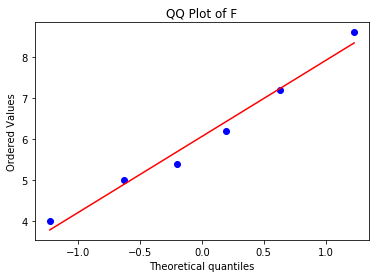

In [14]:
#Q1a - QQ plot for each group (separately)
import pylab 
# QQ plot For Front
scipy.stats.probplot(F, dist="norm", plot=pylab)
pylab.title('QQ Plot of F') 
pylab.show()

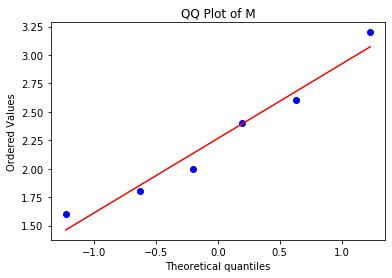

In [15]:
#QQ plot for Middle
scipy.stats.probplot(M, dist="norm", plot=pylab)
pylab.title('QQ Plot of M') 
pylab.show()

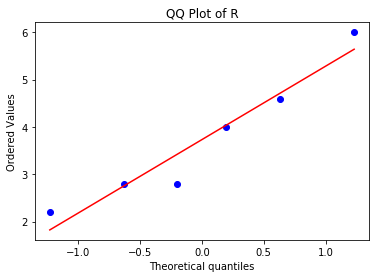

In [16]:
#QQ plot for Rear
scipy.stats.probplot(R, dist="norm", plot=pylab)
pylab.title('QQ Plot of R') 
pylab.show()

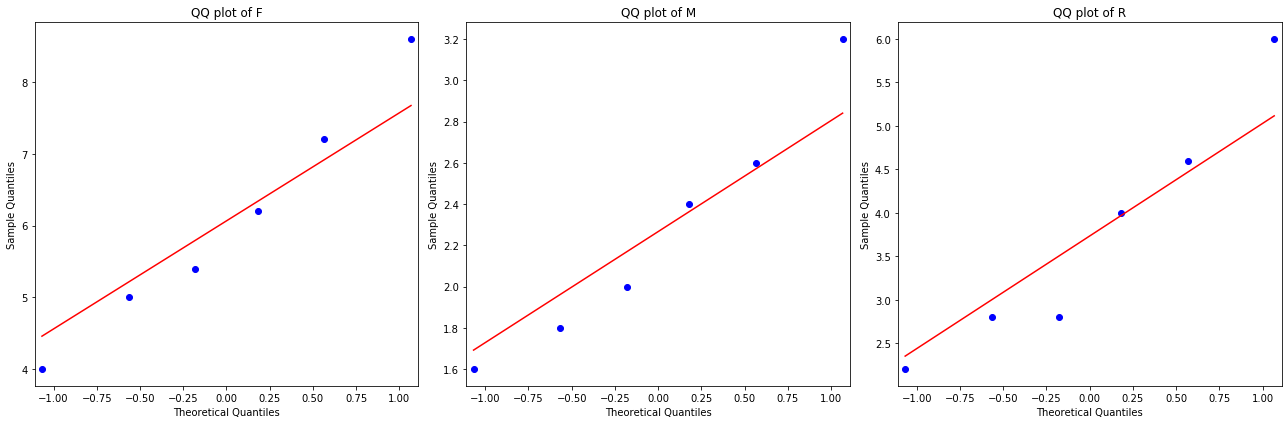

In [18]:
#Q1a - QQ plot for 3 groups in ONE Figure:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9, 3) ) # 9 is the width of figure; 3 is the height of figure


ax = fig.add_subplot(1, 3, 1) #add_subplot(nrows, ncols, index, **kwargs)
sm.graphics.qqplot(F, line='s', ax=ax)
plt.title('QQ plot of F')


ax = fig.add_subplot(1, 3, 2)
sm.graphics.qqplot(M, line='s', ax=ax)
plt.title('QQ plot of M')


ax = fig.add_subplot(1, 3, 3)
sm.graphics.qqplot(R, line='s', ax=ax)
plt.title('QQ plot of R')


fig.tight_layout()

plt.show()

In [19]:
#Shapiro test of normality for each group:
from scipy.stats import shapiro
ShapiroF = scipy.stats.shapiro(F)
ShapiroM = scipy.stats.shapiro(M)
ShapiroR = scipy.stats.shapiro(R)
print('Sales for location = F: ', ShapiroF)
print('Sales for location = M: ', ShapiroM)
print('Sales for location = R: ', ShapiroR)
#p-values are all large

Sales for location = F:  (0.9792823791503906, 0.9479352831840515)
Sales for location = M:  (0.9580121636390686, 0.8042968511581421)
Sales for location = R:  (0.9280329942703247, 0.5649998188018799)


In [ ]:
# Should obtain the histogram with a normal density curve overlaying for each group when checking the normality.
# however, in this case, each sample has very small size (6), hence histogram might not be very helpful in checking the normality.

In [20]:
#EQUAL VARIANCES TEST: 
#Bartlett test (when samples are assumed normality):
Bar = scipy.stats.bartlett(F,M,R)
print(Bar)
# pvalue=0.1161689. Not very large but also not very small. 
# We might treat 3 groups as equal variance.

BartlettResult(statistic=4.305420219203589, pvalue=0.11616890032313539)


In [21]:
###############    ANOVA 
mod = ols('sales ~ location', data=data).fit()
anova = sm.stats.anova_lm(mod, typ=1) # typ = 1 or 2
print(anova)
# p-value = 0.000524

            df     sum_sq    mean_sq          F    PR(>F)
location   2.0  44.071111  22.035556  13.033649  0.000524
Residual  15.0  25.360000   1.690667        NaN       NaN


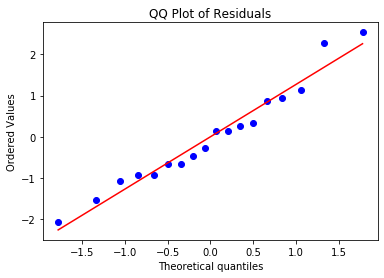

In [22]:
#check if the residuals of ANOVA ~ normal : mod.resid
#print(mod.resid)
scipy.stats.probplot(mod.resid, dist="norm", plot=pylab)
pylab.title('QQ Plot of Residuals') 
pylab.show()
# QQ plot is normal

In [23]:
# (b) can use BONFERRONI TEST or TUKEY  TEST, however, Tukey is stronger in this case
# BONFERRONI TEST:
import statsmodels.stats.multicomp as mc

comparison = mc.MultiComparison(data.sales, data.location)
result, tbl1, tbl2 = comparison.allpairtest(stats.ttest_ind, method= "bonf", alpha = 0.05)
# by default, the Family Wise Error Rate (alpha) is 0.05. Can try with alpha = 0.1
# for each pair, a two independent sample t-test is performed.
print(result)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     F      M  5.3199 0.0003     0.001   True
     F      R  2.6293 0.0252    0.0756  False
     M      R -2.3399 0.0413     0.124  False
---------------------------------------------


In [24]:
### TUKEY
import statsmodels.stats.multicomp as mc

comparison = mc.MultiComparison(data.sales, data.location)
tukey = comparison.tukeyhsd(alpha = 0.05)
print(tukey.summary() )

#Conclusion: Front and Middle have different average sales. 
# Front and Rear also have different average sale, while Middle and Rear have similar average sales.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     F      M     -3.8  0.001 -5.7492 -1.8508   True
     F      R  -2.3333 0.0185 -4.2825 -0.3842   True
     M      R   1.4667 0.1581 -0.4825  3.4158  False
----------------------------------------------------
